In [1]:
### INTRODUCTION ##
import tensorflow as tf # now import the tensorflow module

In [2]:
print(tf.version) # check version, needs to be 2.x+

<module 'tensorflow_core._api.v2.version' from 'C:\\Python\\Anaconda3\\envs\\isye6501\\lib\\site-packages\\tensorflow_core\\_api\\v2\\version\\__init__.py'>


In [3]:
string_ex0 = tf.Variable("this is a string", tf.string)
number_ex0 = tf.Variable(57, tf.int32)
float_ex0 = tf.Variable(57.1256, tf.float64)

In [4]:
## RANK of Tensors ##
# - deepest level of nested lists, i.e. dimensionality
rank1_tensor = tf.Variable(["Test"], tf.string)
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)

In [5]:
tf.rank(rank1_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [6]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [7]:
## SHAPE of Tensors ##
tensor1 = tf.ones([2,2,3]) # tf.ones() creates a shape (i, j, k) tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,2]) # reshape the existing data to shape [2, 3, 1]
tensor3 = tf.reshape(tensor2, [6,- 1]) # -1 tells the tesnor to calculate the size of the dimension in that place, 
                                       # this will reshape the tensor to [3,3]

In [8]:
print(tensor1)
print(tensor2)
print(tensor3)

# notice that it creates dtype = float32 i.e. '1.' not '1' as an int32 or int16

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]], shape=(2, 2, 3), dtype=float32)
tf.Tensor(
[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]], shape=(2, 3, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]], shape=(6, 2), dtype=float32)


In [9]:
## SLICING ##

# Creating a 2D tensor
matrix_ex = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor_ex = tf.Variable(matrix_ex, dtype=tf.int32) 
print(tf.rank(tensor_ex))
print(tensor_ex.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [10]:
three = tensor_ex[0,2]
print(three) # -> 3

row1 = tensor_ex[0]
print(row1) # -> [1, 2, 3, 4, 5] first row

column1 = tensor_ex[:, 0]
print(column1) # -> [1, 6, 11, 16]

row2_and_row4 = tensor_ex[1::2] # start at row index 1 and jump 2 indices
print(row2_and_row4) # self-explanator

column1_in_row2_and_row3 = tensor_ex[1:3, 0]
print(column1_in_row2_and_row3)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


In [11]:
## BACKGROUND KNOWLEDGE ##

(0.0, 6.0, 0.0, 20.0)

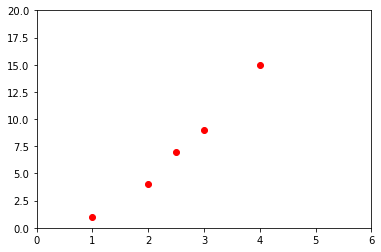

In [1]:
## Linear Regression ##
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

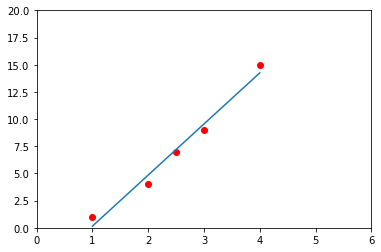

In [5]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

#import tensorflow as tf

In [34]:
# Load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived') # pops 'survived' data column from dftrain and assigns it to y_train
y_eval = dfeval.pop('survived') # pops 'survived' data column from dfeval and assigns it to y_eval

In [32]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [12]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [13]:
dftrain.shape

(627, 9)

In [14]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [15]:
y_train.describe()

count    627.000000
mean       0.387560
std        0.487582
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

<AxesSubplot:>

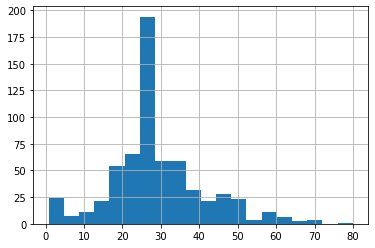

In [26]:
dftrain['age'].hist(bins=20)

<AxesSubplot:>

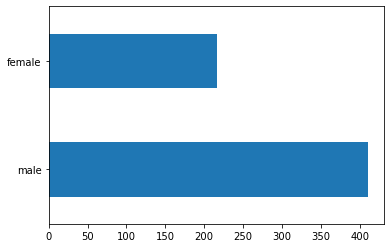

In [27]:
dftrain['sex'].value_counts().plot(kind='barh')

<AxesSubplot:>

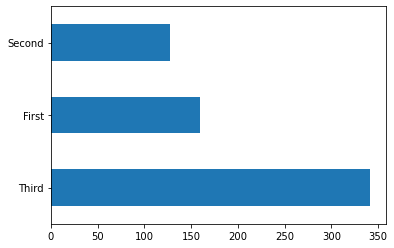

In [28]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

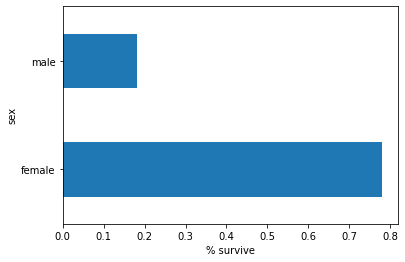

In [37]:
pd.concat([dftrain, y_train], axis=1) \
.groupby('sex') \
.survived.mean() \
.plot(kind='barh') \
.set_xlabel('% survive')

# recombine original df
# group by 'sex'
# calculate survived 'mean'
# plot as bar horizontal
#set x axis label to % survive

In [38]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
# appends a tensorflow feature column that is categorical, based on (feature_name, vocabulary_list)
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
# appends a tensorflow feature column that is numeric, based on(feature_name, dtype=??? e.g. int16/32, float 32/64)

# by the end we have created our feature columns
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [40]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn) # get model metrics/stats by testing on testing data

clear_output() # clear console output
print(result['accuracy']) # the result variable is simple a dict of stats about our model


0.74242425


In [41]:
display(result)

{'accuracy': 0.74242425,
 'accuracy_baseline': 0.625,
 'auc': 0.82782376,
 'auc_precision_recall': 0.7640765,
 'average_loss': 0.52561045,
 'label/mean': 0.375,
 'loss': 0.5232632,
 'precision': 0.624,
 'prediction/mean': 0.47469044,
 'recall': 0.7878788,
 'global_step': 200}

sex                          male
age                            34
n_siblings_spouses              0
parch                           0
fare                           13
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
actual result = 1
predicted_result = 0.36490083


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

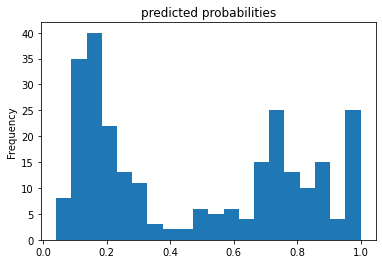

In [50]:
result_1 = list(linear_est.predict(eval_input_fn))
result_1_probs = pd.Series([prediction['probabilities'][1] for prediction in result_1])

clear_output()
print(dfeval.loc[4])
print("actual result =", y_eval.loc[4])
print("predicted_result =", result_1[4]['probabilities'][1])

result_1_probs.plot(kind='hist', bins=20, title='predicted probabilities')